In [145]:
!pip3 install -q --upgrade ipython keras tensorflow
!pip3 install -q --upgrade ipykernel PIL
!ls -la chest_Xray

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
total 36
drwxr-xr-x 5 mathou mathou  4096 mars  16 14:37 .
drwxr-xr-x 5 mathou mathou  4096 mars  30 12:08 ..
-rw-r--r-- 1 mathou mathou 12292 mars  16 14:37 .DS_Store
drwxr-xr-x 4 mathou mathou  4096 mars  16 14:37 test
drwxr-xr-x 4 mathou mathou  4096 mars  16 14:37 train
drwxr-xr-x 4 mathou mathou  4096 mars  16 14:37 val


In [146]:
import os
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [147]:
TEST_PATH = "./chest_Xray/test"
TRAIN_PATH = "./chest_Xray/train"
VAL_PATH = "./chest_Xray/val"

In [148]:
train_X = []
train_Y = []
for elem in os.listdir(TRAIN_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TRAIN_PATH + "/" + elem):
            try:
                path = TRAIN_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                if img.shape[2] ==1:
                    img = np.dstack([img, img, img])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.astype(np.float32)/255.
                train_X.append(img)
                train_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
train_X = np.array(train_X).reshape(-1, 224*224*3)
train_Y = np.array(train_Y)

.DS_Store failed
.DS_Store failed


In [149]:
val_X = []
val_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(VAL_PATH + "/" + elem):
            try:
                path = VAL_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                val_X.append(img)
                val_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
val_X = np.array(val_X).reshape(-1, 224*224*3)
val_Y = np.array(val_Y)

.DS_Store failed
.DS_Store failed


In [150]:
test_X = []
test_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TEST_PATH + "/" + elem):
            try:
                path = TEST_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                test_X.append(img)
                test_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
test_X = np.array(test_X).reshape(-1, 224*224*3)
test_Y = np.array(test_Y)

In [159]:
#Le modèle ne s'entraine pas correctement

model = RandomForestClassifier(random_state = 1, n_estimators=100)
model.fit(train_X, train_Y)
scores = cross_val_score(model, val_X, val_Y)

In [161]:
scores_preds = cross_val_predict(model, test_X, test_Y)
print(str(scores_preds.mean()) + " / " + str(scores_preds.std()))

0.475 / 0.4993746088859544


In [162]:
#J'ai pas compris à quoi ça correspond, plus le chiffre est élevé, mieux c'est apparemment
print(roc_auc_score(test_Y, scores_preds))

0.91


Text(0.5, 1.0, 'ROC Curves')

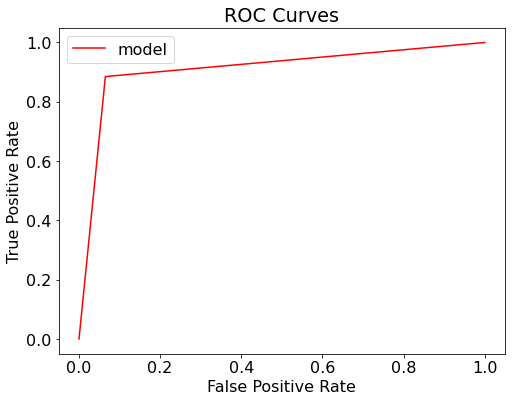

In [163]:
#La courbe devrait avoir cet aspect :
#https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
false_positive, true_positive, _ = roc_curve(test_Y, scores_preds)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
plt.plot(false_positive, true_positive, 'r', label = 'model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

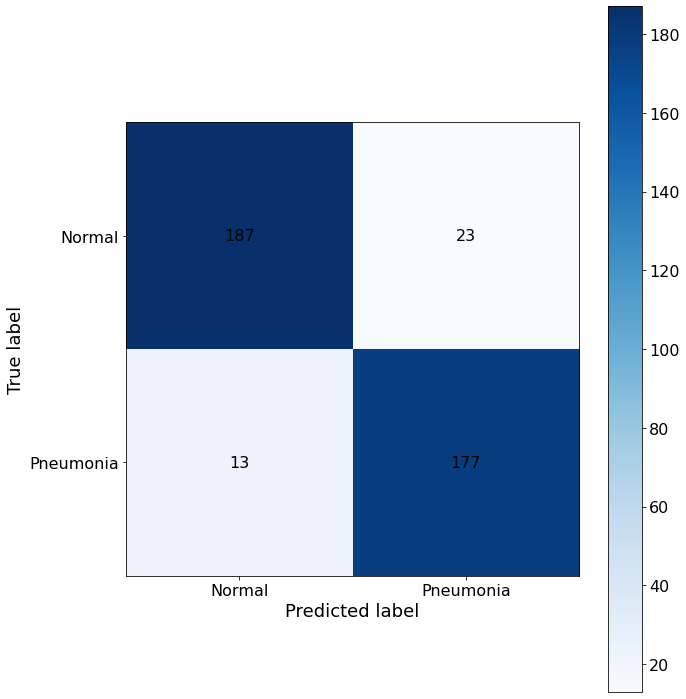

In [164]:
cm = confusion_matrix(test_Y, scores_preds)
classes = ['Normal', 'Pneumonia']
title = 'predictions HeatMap'
plt.figure(figsize = (10, 10))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
for i in range(0, len(classes)):
    for j in range(0, len(classes)):
        text = plt.text(i, j, cm[i, j], ha="center", va="center")
plt.ylabel('True label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.tight_layout()
plt.show()